In [1]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

Using TensorFlow backend.


In [2]:
import os

base_dir = r'C:\Users\user\OneDrive - 台灣智園有限公司\文件\＊WG_New_2020_May\新-上開2020\交付物\交付物１：学习数据指标设计报告\6.20前给上开\学历课程\学历课程 - training dataset'
train_dir = os.path.join(base_dir, 'training_dataset')

# Directory with our training unenthusiastic teaching pictures
train_unenthusiastic_dir = os.path.join(train_dir, 'unenthusiastic')

# Directory with our training enthusiastic teaching pictures
train_enthusiastic_dir = os.path.join(train_dir, 'enthusiastic')


In [3]:
train_unenthusiastic_fnames = os.listdir(train_unenthusiastic_dir)
train_unenthusiastic_fnames.sort()
print(train_unenthusiastic_fnames[:10])

train_enthusiastic_fnames = os.listdir(train_enthusiastic_dir)
print(train_enthusiastic_fnames[:10])

print('total training unenthusiastic images:', len(os.listdir(train_unenthusiastic_dir)))
print('total training enthusiastic images:', len(os.listdir(train_enthusiastic_dir)))


['unenthusiastic1.png', 'unenthusiastic10.png', 'unenthusiastic11.png', 'unenthusiastic12.png', 'unenthusiastic13.png', 'unenthusiastic14.png', 'unenthusiastic15.png', 'unenthusiastic16.png', 'unenthusiastic17.png', 'unenthusiastic18.png']
['enthusiastic1.png', 'enthusiastic10.png', 'enthusiastic11.png', 'enthusiastic12.png', 'enthusiastic13.png', 'enthusiastic14.png', 'enthusiastic15.png', 'enthusiastic16.png', 'enthusiastic17.png', 'enthusiastic18.png']
total training unenthusiastic images: 86
total training enthusiastic images: 27


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

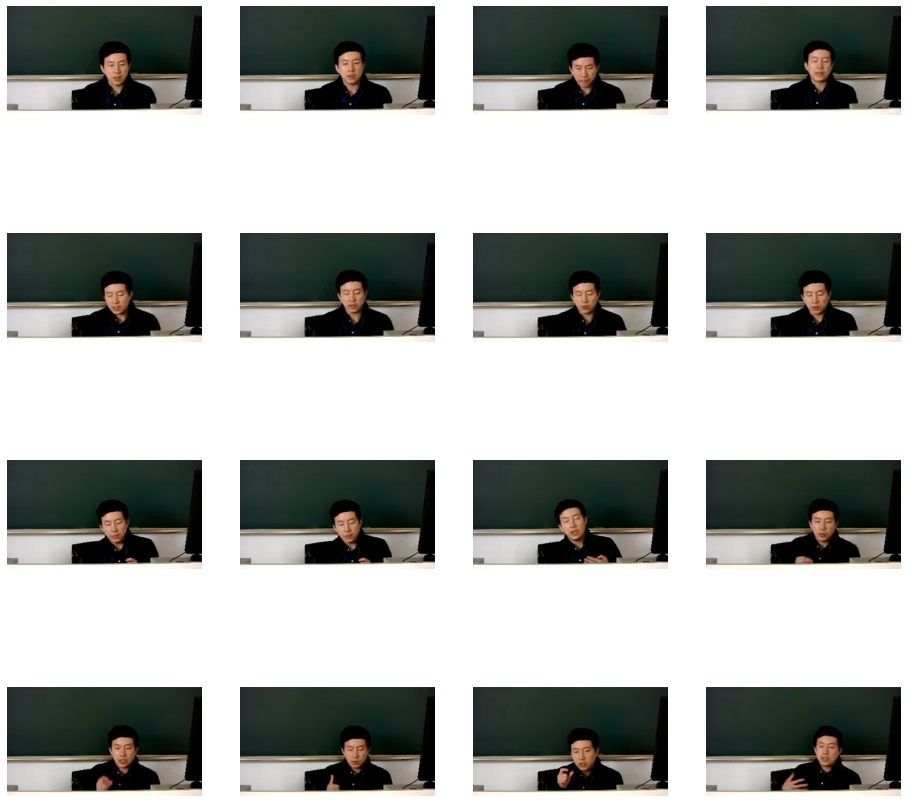

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_unenthusiastic_pix = [os.path.join(train_unenthusiastic_dir, fname) 
                for fname in train_unenthusiastic_fnames[pic_index-8:pic_index]]
next_enthusiastic_pix = [os.path.join(train_enthusiastic_dir, fname) 
                for fname in train_enthusiastic_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_unenthusiastic_pix+next_enthusiastic_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Our input feature map is 333X333x3: 333X333 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(333, 333, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


In [7]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 333, 333, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 331, 331, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 165, 165, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 163, 163, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 81, 81, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 79, 79, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 39, 39, 64)        0     

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(333, 333),  # All images will be resized to 333X333
        classes= ['unenthusiastic', 'enthusiastic'],    #defult: 0为前者, 1会后者
        batch_size=9,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 113 images belonging to 2 classes.


In [11]:
train_labels = train_generator.classes 
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=13,  # 113 images = batch_size * steps
      epochs=4,
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 13 steps
Epoch 1/4
13/13 - 39s - loss: 3.4015 - acc: 0.6549
Epoch 2/4
13/13 - 33s - loss: 0.3927 - acc: 0.8407
Epoch 3/4
13/13 - 31s - loss: 0.2380 - acc: 0.9292
Epoch 4/4
13/13 - 36s - loss: 0.1082 - acc: 0.9646


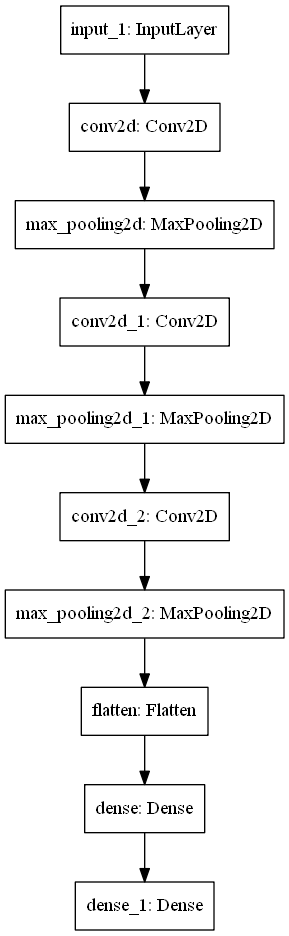

In [13]:
from tensorflow.keras.utils import plot_model
import pydot_ng as pydot

plot_model(model, to_file='model.png')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


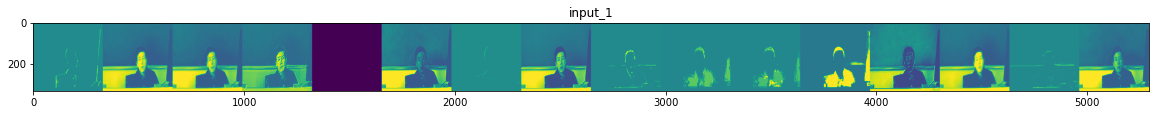

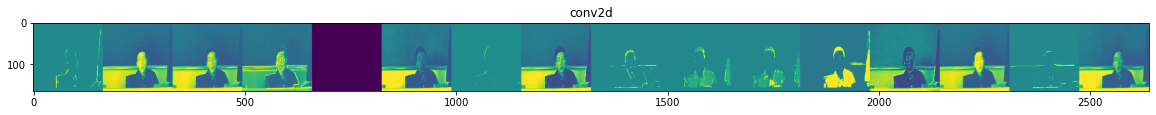

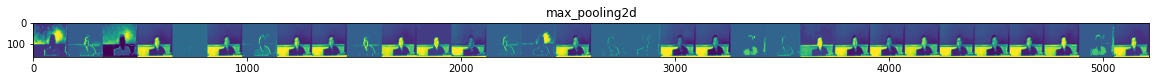

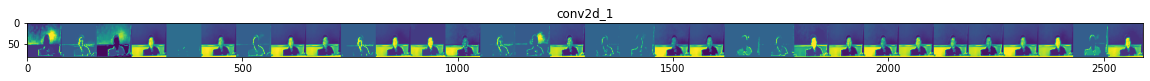

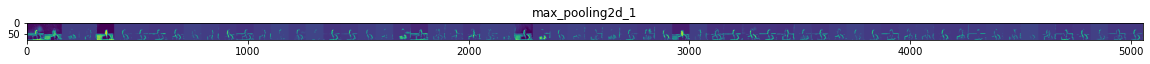

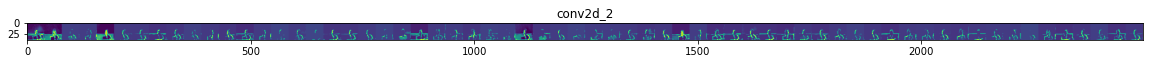

In [14]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a unenthusiastic or ununenthusiastic from the training set.
unenthusiastic_img_files = [os.path.join(train_unenthusiastic_dir, f) for f in train_unenthusiastic_fnames]
enthusiastic_img_files = [os.path.join(train_enthusiastic_dir, f) for f in train_enthusiastic_fnames]
img_path = random.choice(unenthusiastic_img_files + unenthusiastic_img_files)

img = load_img(img_path, target_size=(333, 333))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (333, 333, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 333, 333, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training loss')

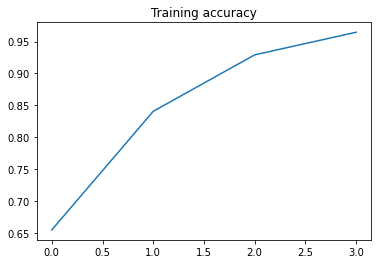

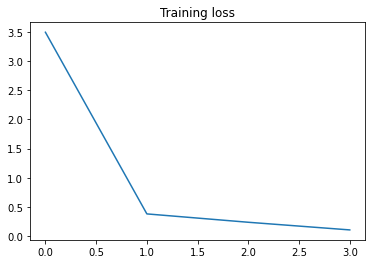

In [15]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.title('Training accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.title('Training loss')

In [45]:
test_dir = os.path.join(base_dir, 'test_dataset')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(333, 333),
        batch_size=9,
        class_mode='binary',
        shuffle=False)    #it is important to specify shuffle=False in order to preserve 
                          #the order of filenames and predictions.

pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)

# Get classes by np.round
cl = np.round(pred)
# Get filenames (set shuffle=false in generator is important)
filenames=test_generator.filenames

# Data frame
results=pd.DataFrame({"file":filenames,"pr":pred[:,0], "class":cl[:,0]})


Found 113 images belonging to 1 classes.
13/13 [==============================] - 13s 1s/step


In [46]:
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows', 252)

results

,file,pr,class
0,test\C3_test (1).png,0.064796,0.0
1,test\C3_test (10).png,0.064796,0.0
2,test\C3_test (100).png,0.000259,0.0
3,test\C3_test (101).png,0.000619,0.0
4,test\C3_test (102).png,0.000595,0.0
5,test\C3_test (103).png,0.000173,0.0
6,test\C3_test (104).png,0.001455,0.0
7,test\C3_test (105).png,0.016556,0.0
8,test\C3_test (106).png,0.005046,0.0
9,test\C3_test (107).png,0.006706,0.0


In [47]:
len(results.loc[results['class'] == 1.0])

21

In [48]:
len(results.loc[results['class'] == 0])

92

In [16]:
import numpy as np
import skimage

unen_img = []
for i in range(86):
    img_path = os.path.join(train_unenthusiastic_dir, 'unenthusiastic'+str( (i+1))+'.png')
    img = load_img(img_path, target_size=(333, 333))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255
    unen_img.append(x)

len(unen_img)

86

In [17]:
prob_of_en_on_unenIMG = []
for i in range(86):
    a = model.predict(unen_img[i])
    a = a.flatten()
    a = a.tolist()
    prob_of_en_on_unenIMG.append(a)

prob_of_en_on_unenIMG
#You have predicted class probabilities. Since you are doing binary classification. 
#You have a dense layer consisting of one unit with an activation function of the sigmoid. 
#Sigmoid function outputs a value in the range [0,1] which corresponds to 
# the probability of the given sample belonging to a positive class (i.e. class one).

#通过train_labels = train_generator.classes 查询, 
#我们知道"enthusiastic"是1 (positive class), "unenthusiastic"是0 (negative class). 

[[0.0017989195184782147],
 [8.288393291877583e-05],
 [0.00014241569442674518],
 [0.00010463024955242872],
 [5.5925069318618625e-05],
 [0.00010328682401450351],
 [7.400535105261952e-05],
 [8.943142165662721e-05],
 [8.81044179550372e-05],
 [0.00015228026313707232],
 [0.0007251338684000075],
 [9.555240831105039e-05],
 [0.0010253681102767587],
 [0.0005310665583238006],
 [0.0011267767986282706],
 [0.0012592311250045896],
 [0.017838284373283386],
 [0.006381961517035961],
 [0.0024708337150514126],
 [0.0038016398902982473],
 [0.002483068034052849],
 [0.00013414063141681254],
 [0.0005473835044540465],
 [0.00018781103426590562],
 [0.000977715477347374],
 [0.0019893432036042213],
 [0.0015385557198897004],
 [0.008080515079200268],
 [0.0002039217943092808],
 [0.0002590120129752904],
 [0.0006186270038597286],
 [0.0005953945801593363],
 [0.0001727230119286105],
 [0.001455002697184682],
 [0.016556406393647194],
 [0.005045627243816853],
 [0.006705549079924822],
 [0.0032933377660810947],
 [0.00025732273

In [18]:
en_img = []
for i in range(27):
    img_path = os.path.join(train_enthusiastic_dir, 'enthusiastic'+str( (i+1))+'.png')
    img = load_img(img_path, target_size=(333, 333))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255
    en_img.append(x)

len(en_img)

27

In [19]:
prob_of_en_on_enIMG = []
for i in range(27):
    b = model.predict(en_img[i])
    b = b.flatten()
    b = b.tolist()
    prob_of_en_on_enIMG.append(b)

prob_of_en_on_enIMG

[[0.06479611247777939],
 [0.9739108681678772],
 [0.39222779870033264],
 [0.7557780146598816],
 [0.859433650970459],
 [0.7635459899902344],
 [0.6532277464866638],
 [0.9426313042640686],
 [0.5434604287147522],
 [0.06479611247777939],
 [0.9739108681678772],
 [0.39222779870033264],
 [0.7557780146598816],
 [0.859433650970459],
 [0.7635459899902344],
 [0.6532277464866638],
 [0.9426313042640686],
 [0.5434604287147522],
 [0.06479611247777939],
 [0.9739108681678772],
 [0.39222779870033264],
 [0.7557780146598816],
 [0.859433650970459],
 [0.7635459899902344],
 [0.6532277464866638],
 [0.9426313042640686],
 [0.5434604287147522]]

In [20]:
unen_img_squeeze = []

for i in range(86):
    c = np.squeeze(unen_img[i], axis=0)
    unen_img_squeeze.append(c)

In [21]:
en_img_squeeze = []

for i in range(27):
    d = np.squeeze(en_img[i], axis=0)
    en_img_squeeze.append(d)

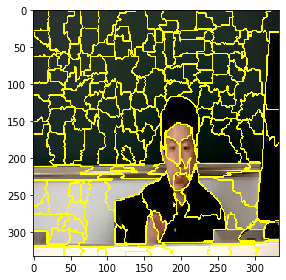

In [22]:
#Generate segmentation for image
import skimage.segmentation
import skimage.io
superpixels = skimage.segmentation.quickshift(en_img_squeeze[3], kernel_size=3, max_dist=150, ratio=0.5)
num_superpixels = np.unique(superpixels).shape[0]
skimage.io.imshow(skimage.segmentation.mark_boundaries(en_img_squeeze[3], superpixels))


In [23]:
num_superpixels

144

In [24]:
#Generate perturbations
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations.shape

(150, 144)

[1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1
 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0
 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0
 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0]


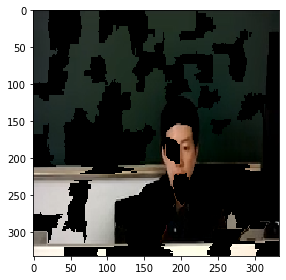

In [25]:
#Create function to apply perturbations to images
import copy
def perturb_image(img,perturbation,segments): 
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

#Show example of perturbations
print(perturbations[0]) 
skimage.io.imshow(perturb_image(en_img_squeeze[3],perturbations[0],superpixels))

In [26]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(en_img_squeeze[0],pert,superpixels)
  pred = model.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
print(predictions.shape)

(150, 1, 1)


In [27]:
#Compute distances to original image
import sklearn.metrics
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
print(distances.shape)

#Transform distances to a value between 0 an 1 (weights) using a kernel function
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
print(weights.shape)

(150,)
(150,)


In [28]:
predictions_sq = np.squeeze(predictions, axis=1)

In [29]:
predictions_sq = np.squeeze(predictions_sq, axis=1)

In [30]:
#Estimate linear model
from sklearn.linear_model import LinearRegression
simpler_model = LinearRegression().fit(X=perturbations, y=predictions_sq, sample_weight=weights)
coeff = simpler_model.coef_

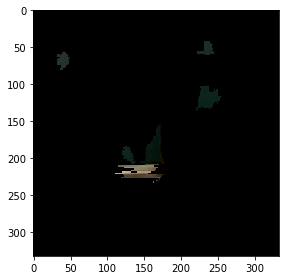

In [31]:
#Use coefficients from linear model to extract top features
num_top_features = 5
top_features = np.argsort(coeff)[-5:] #10 = num_top_features

#Show only the superpixels corresponding to the top features
mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(en_img_squeeze[3],mask,superpixels))

In [32]:
def perturb_image2(mask, segments): 
  active_pixels = top_features
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  return mask

C = perturb_image2(mask, superpixels)
D = np.int64(C)
D

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

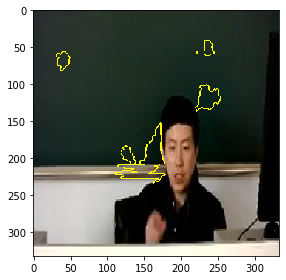

In [33]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(en_img_squeeze[3], D))

In [34]:
from lime import lime_image
import time

In [35]:
explainer = lime_image.LimeImageExplainer()

In [36]:
explanation = explainer.explain_instance(en_img_squeeze[3], model, hide_color=0)

In [37]:
tmp = time.time()
print(time.time() - tmp)

0.0


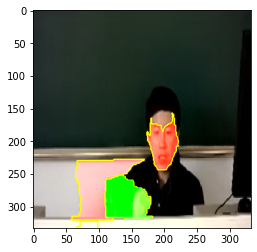

In [38]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

In [39]:
en_img_squeeze[1].shape #直接餵給inceptionV3_model.predict需要(batch_size, 299, 299, 3) = Xi[np.newaxis,:,:,:]
                        #餵給explainer.explain_instance只需(299, 299, 3) = Xi (非0-1 or 0-255)

(333, 333, 3)

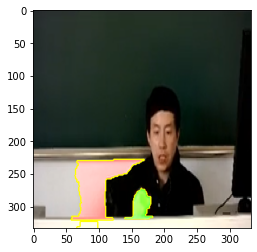

In [40]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=2, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

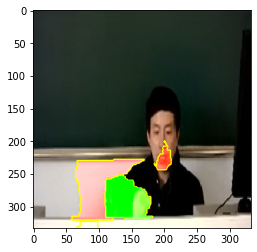

In [41]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

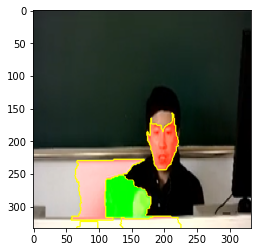

In [42]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=6, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

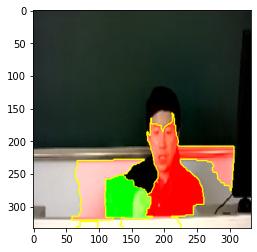

In [43]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=9, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

In [53]:
prob_of_en_on_enIMG_F = [val for sublist in prob_of_en_on_enIMG for val in sublist]

top_50_idx = np.argsort(prob_of_en_on_enIMG_F)[-50:]
top_50_values = [prob_of_en_on_enIMG_F[i] for i in top_50_idx]

print(top_50_idx)
print(top_50_values)


[ 0 18  9 20  2 11 17  8 26  6 24 15 12 21  3  5 23 14 22  4 13  7 16 25
  1 10 19]
[0.06479611247777939, 0.06479611247777939, 0.06479611247777939, 0.39222779870033264, 0.39222779870033264, 0.39222779870033264, 0.5434604287147522, 0.5434604287147522, 0.5434604287147522, 0.6532277464866638, 0.6532277464866638, 0.6532277464866638, 0.7557780146598816, 0.7557780146598816, 0.7557780146598816, 0.7635459899902344, 0.7635459899902344, 0.7635459899902344, 0.859433650970459, 0.859433650970459, 0.859433650970459, 0.9426313042640686, 0.9426313042640686, 0.9426313042640686, 0.9739108681678772, 0.9739108681678772, 0.9739108681678772]


In [54]:
a_dictionary = {}

for i in top_50_idx:
    a_dictionary['explanation%s' %i] = explainer.explain_instance(en_img_squeeze[i], model, hide_color=0)

In [55]:
from skimage.segmentation import mark_boundaries
dic_temp = {}
dic_mask = {}

for i in top_50_idx: 
    temp['temp%s' %i], mask['mask%s' %i] = a_dictionary['explanation' + str(i)].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

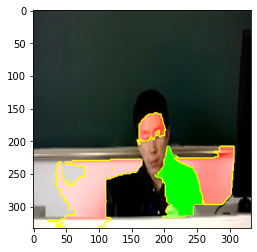

In [56]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation0'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

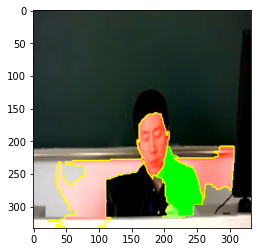

In [57]:
temp, mask = a_dictionary['explanation18'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

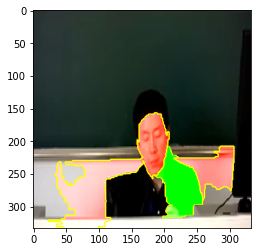

In [58]:
temp, mask = a_dictionary['explanation9'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

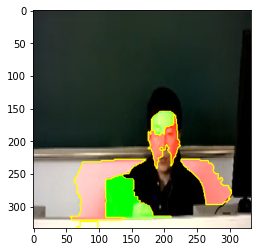

In [59]:
temp, mask = a_dictionary['explanation20'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

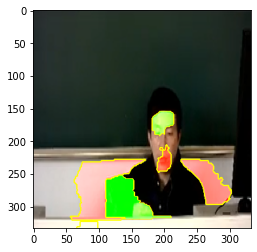

In [60]:
temp, mask = a_dictionary['explanation2'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

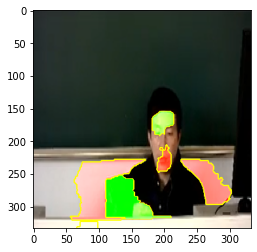

In [61]:
temp, mask = a_dictionary['explanation11'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

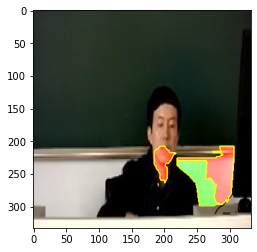

In [62]:
temp, mask = a_dictionary['explanation17'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

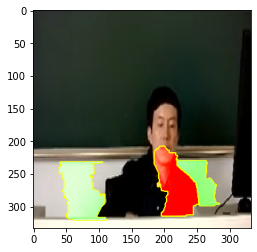

In [63]:
temp, mask = a_dictionary['explanation8'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

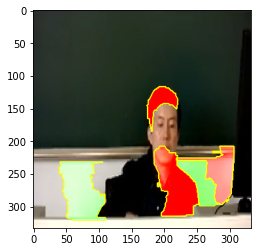

In [102]:
temp, mask = a_dictionary['explanation26'].get_image_and_mask(0, positive_only=False, num_features=8, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

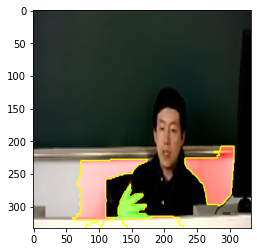

In [65]:
temp, mask = a_dictionary['explanation6'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

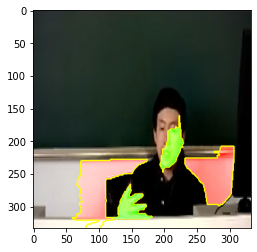

In [66]:
temp, mask = a_dictionary['explanation15'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

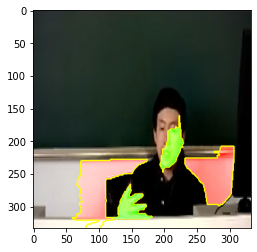

In [101]:
temp, mask = a_dictionary['explanation24'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

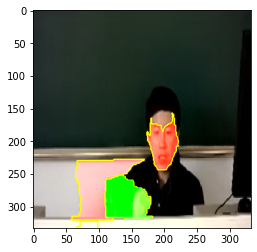

In [86]:
temp, mask = a_dictionary['explanation12'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

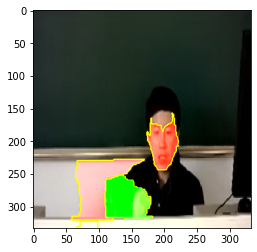

In [69]:
temp, mask = a_dictionary['explanation21'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

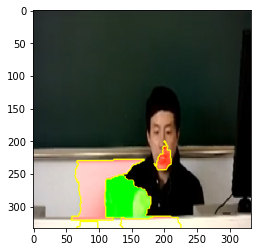

In [70]:
temp, mask = a_dictionary['explanation3'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

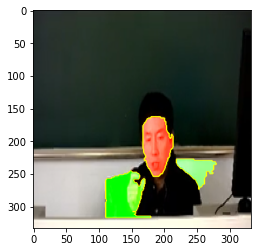

In [91]:
temp, mask = a_dictionary['explanation5'].get_image_and_mask(0, positive_only=False, num_features=6, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

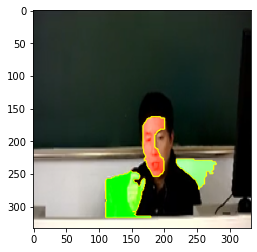

In [72]:
temp, mask = a_dictionary['explanation23'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

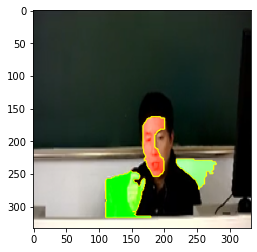

In [73]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation14'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

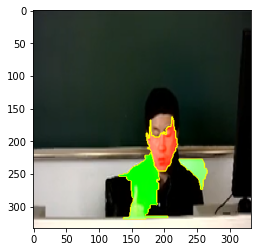

In [92]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation22'].get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

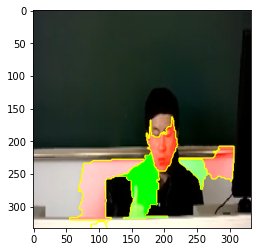

In [75]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation4'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

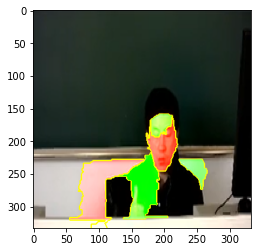

In [76]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation13'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

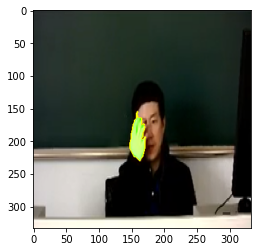

In [96]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation7'].get_image_and_mask(0, positive_only=False, num_features=1, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

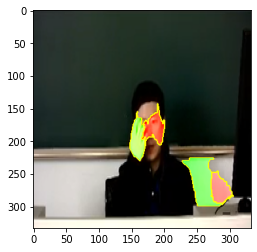

In [78]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation16'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

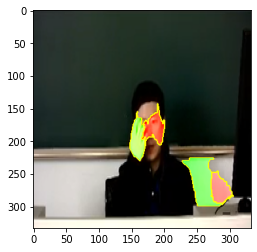

In [79]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation25'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

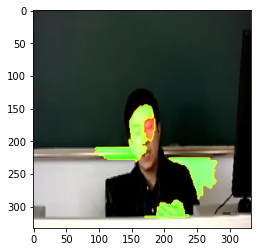

In [98]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation1'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

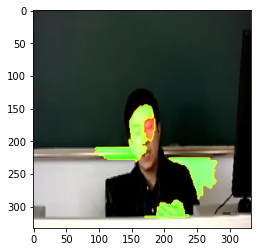

In [81]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation10'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

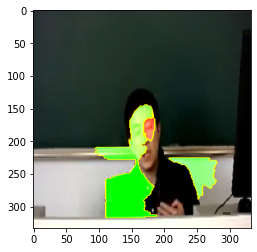

In [82]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation19'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

In [103]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([148, 42])
nobs = np.array([252, 73])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))



0.855
